# **Prepare datasets**

Kita akan melakukan training dengan menggunakan dataset ["train_preprocess.tsv"](https://drive.google.com/file/d/1RCHGfn9JJyyReAh8PIIoF8Ch0H3miP0u/view) untuk membuat model analisis sentiment menggunakan LSTM.

Setelah kita download dataset, kita masukan ke dalam folder Data. Setelah itu kita panggil dengan Pandas.

In [1]:
import pandas as pd

df_Data = pd.read_csv('Data/train_preprocess.tsv.txt',sep='\t', names=['text', 'label'])

Terdapat 11000 row dan 2 column yang kita beri nama kolom 'text' dan 'label'.

In [2]:
print("data test:", df_Data.shape)

data test: (11000, 2)


In [3]:
df_Data.head()

,text,label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative


Kita cek isi datasetnya dan di dalamnya terdapat 11000 data. Terdiri dari:


*   Positive: 6416 (58%)
*   Negative: 3436 (31%)
*   Neutral: 1148 (10%)




In [4]:
df_Data.label.value_counts()

label
positive    6416
negative    3436
neutral     1148
Name: count, dtype: int64

Text(0.5, 1.0, 'Diagram Persentase Positive, Negative, dan Neutral pada Dataset')

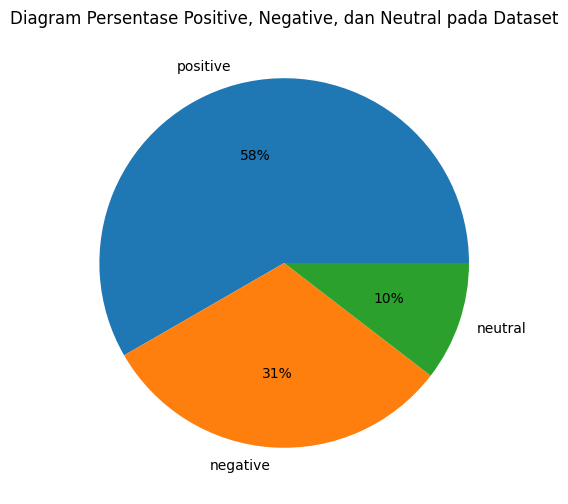

In [5]:
import matplotlib.pyplot as plt

label_name = ['positive', 'negative', 'neutral']

fig = plt.figure(figsize=(6,6))
ax = plt.axes()
ax.pie(df_Data["label"].value_counts(), labels=label_name, autopct='%1.0f%%')
ax.set_title('Diagram Persentase Positive, Negative, dan Neutral pada Dataset')

# **Text Normalization/Cleansing**

In [6]:
# Slicing rows in data frame
# df = df_Data.iloc[0:10]
df = df_Data
# data frame after slicing
df

,text,label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative
...,...,...
10995,tidak kecewa,positive
10996,enak rasa masakan nya apalagi kepiting yang me...,positive
10997,hormati partai-partai yang telah berkoalisi,neutral
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative


Lalu kita lakukan cleansing sebagai berikut

In [7]:
# pip install Sastrawi

Filtering (Stopword Removal). Stopword adalah kata umum yang biasanya muncul dalam jumlah besar dan dianggap tidak memiliki makna. Contoh stopword dalam bahasa Indonesia adalah “yang”, “dan”, “di”, “dari”, dll. Makna di balik penggunaan stopword yaitu dengan menghapus kata-kata yang memiliki informasi rendah dari sebuah teks, kita dapat fokus pada kata-kata penting sebagai gantinya.

Stemming adalah proses menghilangkan infleksi kata ke bentuk dasarnya, namun bentuk dasar tersebut tidak berarti sama dengan akar kata (root word). Misalnya kata “mendengarkan”, “dengarkan”, “didengarkan” akan ditransformasi menjadi kata “dengar”.

In [8]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
print(stopwords)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [9]:
# pip install nltk

In [10]:
import nltk
# nltk.download()
import string

In [11]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
from nltk.tokenize import word_tokenize 
 

stop_factory = StopWordRemoverFactory().get_stop_words() #load defaul stopword
more_stopword = ['nya', 'yang'] #menambahkan stopword
kalimat = "batagor nya tidak amis bau nya sila coba yang pernah coba"
kalimat = kalimat.lower()
data = stop_factory + more_stopword #menggabungkan stopword
 
dictionary = ArrayDictionary(data)
str = StopWordRemover(dictionary)
tokens = nltk.tokenize.word_tokenize(str.remove(kalimat))

print(str.remove(kalimat))
print(tokens)
# output
# ['andi', 'kerap', 'transaksi', 'rutin', 'andi', 'belanja', 'praktis', 'murah']

batagor tidak amis bau sila coba pernah coba
['batagor', 'tidak', 'amis', 'bau', 'sila', 'coba', 'pernah', 'coba']


In [12]:
# import StemmerFactory class
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemming process
sentence = 'Perekonomian Indonesia sedang dalam pertumbuhan yang membanggakan'
output   = stemmer.stem(sentence)
print(output) # ekonomi indonesia sedang dalam tumbuh yang bangga
print(stemmer.stem('Mereka meniru-nirukannya')) # mereka tiru

ekonomi indonesia sedang dalam tumbuh yang bangga
mereka tiru


In [13]:
alay_dict = pd.read_csv('Data/new_kamusalay.csv', names = ['original', 'replacement'], encoding='latin-1')

In [14]:
alay_dict_map = dict(zip(alay_dict['original'], alay_dict['replacement']))
def normalize_alay(text):
    return ' '.join([alay_dict_map[word] if word in alay_dict_map else word for word in text.split(' ')])

In [15]:
import re 
def cleansing(sent):
    text = sent.lower() #lowercase
    text = text.strip() #menghapus spasi di awal dan akhir
    text = re.sub(r'\n', ' ', text, flags=re.IGNORECASE)
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text) # Remove every URL
    text = re.sub(r'(.)\1\1+', r'\1', text) #menghapus karakter berulang
    text = re.sub('[^0-9a-zA-Z]+', ' ', text) #menghapus karakter non-alpanumerik
    text = re.sub(r'[øùºðµ¹ª³]', '', text, flags=re.IGNORECASE)
    text = re.sub(r'â', 'a', text, flags=re.IGNORECASE)
    text = re.sub(r'\s+', ' ', text).strip() #menghapus spasi berlebih dan mengganti dengan satu spasi
    text = re.sub(r'^\s+$', '', text) #menghapus seluruh kalimat yg hanya berisi spasi
    text = stemmer.stem(text) # melakukan stemming
    text = str.remove(text) # menghapus stopwords
    text = normalize_alay(text)

    return text

In [16]:
txtx = "anakjakartaasikasik adlh agma aj yang punya nya."
cleansing(txtx)

'anak jakarta asyik asyik adalah agama saja punya'

In [17]:
df['text_clean'] = df.text.apply(cleansing)

In [18]:
df.head()

,text,label,text_clean
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,warung milik usaha pabrik tahu sudah puluh tah...
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,mohon ulama lurus k212 mmbri hujjah partai apa...
2,lokasi strategis di jalan sumatera bandung . t...,positive,lokasi strategis jalan sumatra bandung tempat ...
3,betapa bahagia nya diri ini saat unboxing pake...,positive,betapa bahagia diri saat unboxing paket barang...
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,aduh jadi mahasiswa jangan sombong dong kasih ...


Save cleaned data to excel

In [19]:
df[['text_clean', 'label']].to_csv("cleaned.csv")

Sortir data dan label berdasarkan sentimen

In [20]:
neg = df.loc[df['label'] == 'negative'].text_clean.tolist()
neu = df.loc[df['label'] == 'neutral'].text_clean.tolist()
pos = df.loc[df['label'] == 'positive'].text_clean.tolist()

neg_label = df.loc[df['label'] == 'negative'].label.tolist()
neu_label = df.loc[df['label'] == 'neutral'].label.tolist()
pos_label = df.loc[df['label'] == 'positive'].label.tolist()

In [21]:
total_data = pos + neu + neg
labels = pos_label + neu_label + neg_label

print("Pos: %s, Neu: %s, Neg: %s" % (len(pos), len(neu), len(neg)))
print("Total data: %s" % len(total_data))

Pos: 6416, Neu: 1148, Neg: 3436
Total data: 11000


# **Feature Extraction**

Setelah itu kita lakukan Feature Extraction menggunakan modul "Tokenizer" dan "pad_sequences" dari Tensorflow.

Module Tokenizer memungkinkan untuk memvektorisasi korpus teks, dengan mengubah setiap teks menjadi urutan bilangan bulat (setiap bilangan bulat menjadi indeks token dalam kamus) atau menjadi vektor di mana koefisien untuk setiap token bisa biner, berdasarkan jumlah kata , berdasarkan tf-idf.

Module pad_sequences memungkinkan mengubah list dari sequences menjadi array bentuk 2D.

In [22]:
import pickle
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from collections import defaultdict

max_features = 100000
tokenizer = Tokenizer(num_words=max_features, split=' ', lower=True)
tokenizer.fit_on_texts(total_data)
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print("tokenizer.pickle has created!")

X = tokenizer.texts_to_sequences(total_data)

vocab_size = len(tokenizer.word_index)
maxlen = max(len(x) for x in X)

X = pad_sequences(X)
with open('x_pad_sequences.pickle', 'wb') as handle:
    pickle.dump(X, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print("x_pad_sequences.pickle has created!")


tokenizer.pickle has created!
x_pad_sequences.pickle has created!


In [23]:
Y = pd.get_dummies(labels)
Y = Y.values

with open('y_labels.pickle', 'wb') as handle:
    pickle.dump(Y, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print("y_labels.pickle has created!")

y_labels.pickle has created!


# **Prepare train & test datasets/Splitting Dataset**

Split dataset menjadi 80% untuk train dan 20% untuk test.

In [24]:
from sklearn.model_selection import train_test_split

file = open("x_pad_sequences.pickle",'rb')
X = pickle.load(file)
file.close()

file = open("y_labels.pickle",'rb')
Y = pickle.load(file)
file.close()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

# **Training**

Jalankan training dengan metode LSTM. Arsitektur LSTM ini dibangun menggunakan framework Tensorflow.

In [25]:
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, SimpleRNN, Activation
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.layers import Flatten
from tensorflow.keras import backend as K

Adapun arsitektur LSTM yang dibangun sebagai berikut:


*   Input Layer: Data teks setelah dilakukan Feature Extraction, dikondisikan menjadi sebuah matrix berdimensi 100.
*   Unit Layer: Pada bagian ini diterapkan unit/neuron sejumlah 64. Pada tahap ini pula fitur Dropout diterapkan guna meminimalisir overfitting.
*   Fully-connected Layer: Setelah proses convolution, dikondisikan sebagai input untuk Multi-layer Perceptron terdiri dari 10 input dan 3 output. Pada tahap ini diimplementasikan pula aktivasi "softmax".

Untuk mencegah overfitting, kita menerapkan EarlyStopping. Sehingga, meskipun epoch belum selesai, training sudah selesai.

In [26]:
embed_dim = 100
units = 64

model = Sequential()
model.add(Embedding(max_features, embed_dim, input_length=X.shape[1]))
model.add(LSTM(units, dropout=0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

adam = optimizers.Adam(learning_rate = 0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_data=(X_test, y_test), verbose=1, callbacks=[es])



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 79, 100)           10000000  
                                                                 
 lstm (LSTM)                 (None, 64)                42240     
                                                                 
 dense (Dense)               (None, 3)                 195       
                                                                 
Total params: 10042435 (38.31 MB)
Trainable params: 10042435 (38.31 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/10


880/880 [==============================] - 90s 99ms/step - loss: 0.4546 - accuracy: 0.8170 - val_loss: 0.3673 - val_accuracy: 0.8609
Epoch 2/10
880/880 [==============================] - 72s 81ms/step - loss: 0.2208 - accuracy: 0.9205 - val_loss: 0.3774 - va

# Evaluation

## Confussion Matrix, Accuracy, F1, Recall, Precision

Langkah selanjutnya adalah "Evaluation". Module "classification_report" dari Sklearn merupakan salah satu modul untuk melakukan "Evaluation". Pada tahap evaluasi ini kita akan menerapkan metode evaluasi Accuracy, Precision, Recall dan F1-Score.

In [27]:
from sklearn import metrics

predictions = model.predict(X_test)
y_pred = predictions
matrix_test = metrics.classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print("Testing selesai")
print(matrix_test)

69/69 [==============================] - 2s 10ms/step
Testing selesai
              precision    recall  f1-score   support

           0       0.85      0.74      0.79       685
           1       0.83      0.78      0.80       233
           2       0.87      0.94      0.91      1282

    accuracy                           0.86      2200
   macro avg       0.85      0.82      0.83      2200
weighted avg       0.86      0.86      0.86      2200



Hasilnya nilai F1 Score ada pada angka 0.76 untuk Negative, 0.59 untuk Neutral, dan 0.83 untuk Positive. Hasil ini bisa dikatakan cukup bagus untuk sebuah model, namun kecenderungan untuk memilih sentimen netralnya lemah.

## Cross Validation

Mekanisme evaluasi selanjutnya menggunakan "Cross Validation", yaitu merotasi porsi testing dari dataset agar bisa melihat model yang sudah kita buat stabil ketika dihadapkan pada data yang berbeda.

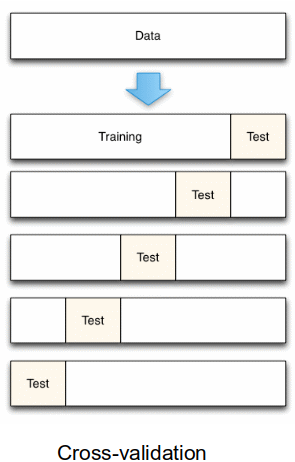

In [28]:
# Untuk lebih menyakinkan lagi, kita juga bisa melakukan "Cross Validation"
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=5,random_state=42,shuffle=True)

accuracies = []

y = Y

embed_dim = 100
units = 64

for iteration, data in enumerate(kf.split(X), start=1):

    data_train   = X[data[0]]
    target_train = y[data[0]]

    data_test    = X[data[1]]
    target_test  = y[data[1]]


    model = Sequential()
    model.add(Embedding(max_features, embed_dim, input_length=X.shape[1]))
    model.add(LSTM(units, dropout=0.2))
    model.add(Dense(3,activation='softmax'))
    # model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])

    adam = optimizers.Adam(learning_rate = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

    es = EarlyStopping(monitor='val_loss', mode='min', verbose=0)
    history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_data=(X_test, y_test), verbose=0, callbacks=[es])

    predictions = model.predict(X_test)
    y_pred = predictions

    # for the current fold only
    accuracy = accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))

    print("Training ke-", iteration)
    print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))
    print("======================================================")

    accuracies.append(accuracy)

# this is the average accuracy over all folds
average_accuracy = np.mean(accuracies)

print()
print()
print()
print("Rata-rata Accuracy: ", average_accuracy)

69/69 [==============================] - 1s 9ms/step
Training ke- 1
              precision    recall  f1-score   support

           0       0.85      0.75      0.80       685
           1       0.85      0.79      0.82       233
           2       0.87      0.94      0.91      1282

    accuracy                           0.87      2200
   macro avg       0.86      0.83      0.84      2200
weighted avg       0.87      0.87      0.86      2200

69/69 [==============================] - 1s 8ms/step
Training ke- 2
              precision    recall  f1-score   support

           0       0.82      0.77      0.80       685
           1       0.82      0.78      0.80       233
           2       0.89      0.92      0.90      1282

    accuracy                           0.86      2200
   macro avg       0.84      0.82      0.83      2200
weighted avg       0.86      0.86      0.86      2200

69/69 [==============================] - 1s 11ms/step
Training ke- 3
              precision    recall

Hasilnya nilai rata-rata accuracy pada angka 0.75. Ini menunjukkan model kita cukup stabil pada angka 0.75.

## Visualization

Mekanisme evaluasi selanjutnya menggunakan "Visualization", yaitu mengecek performa training dari arah visualisasinya. Acuan apakah visualisasi bagus atau tidak "Good Fit", sebagai berikut:

**Overfitting**

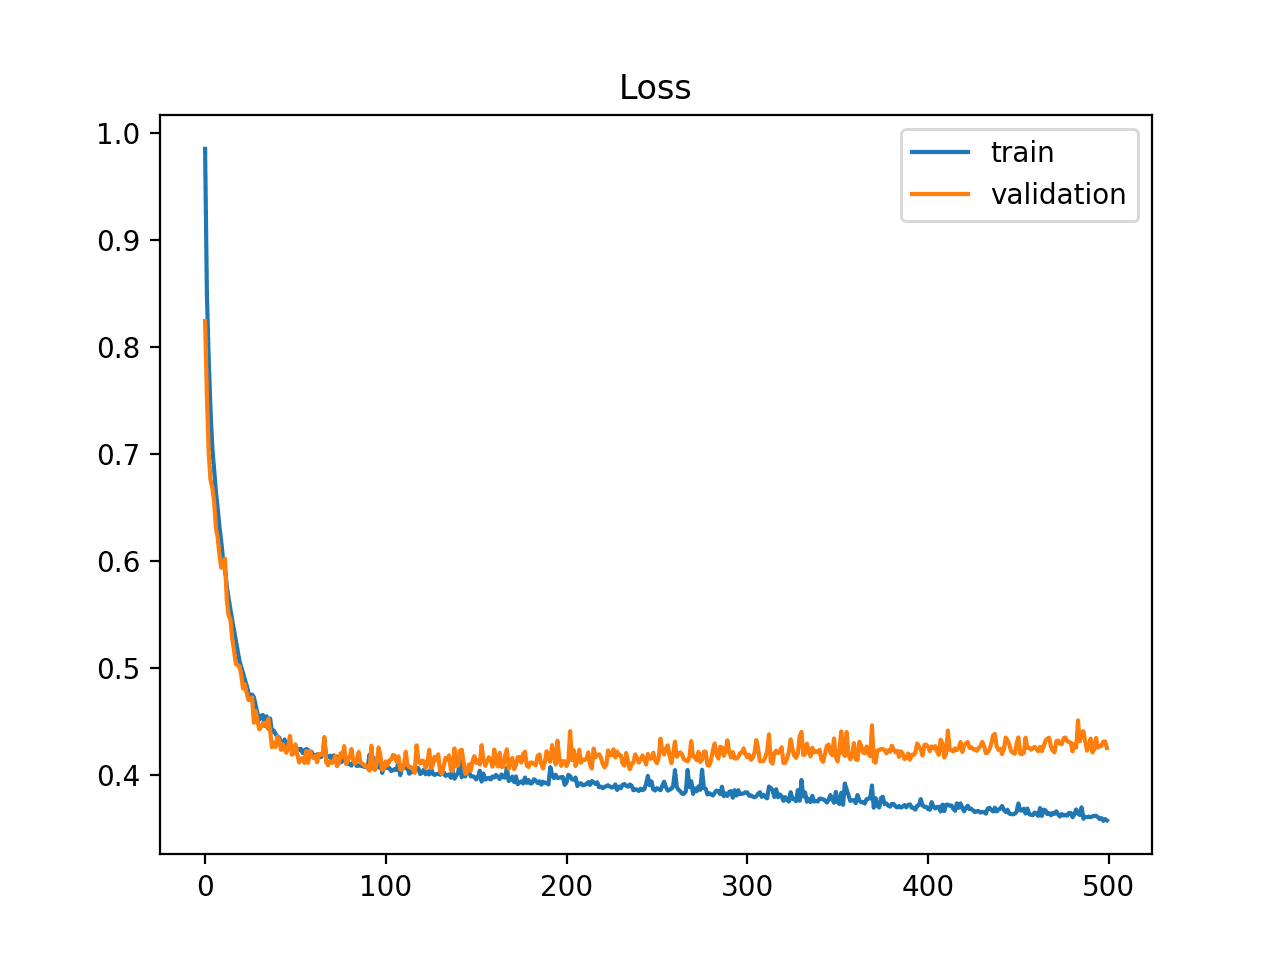

**Underfitting**
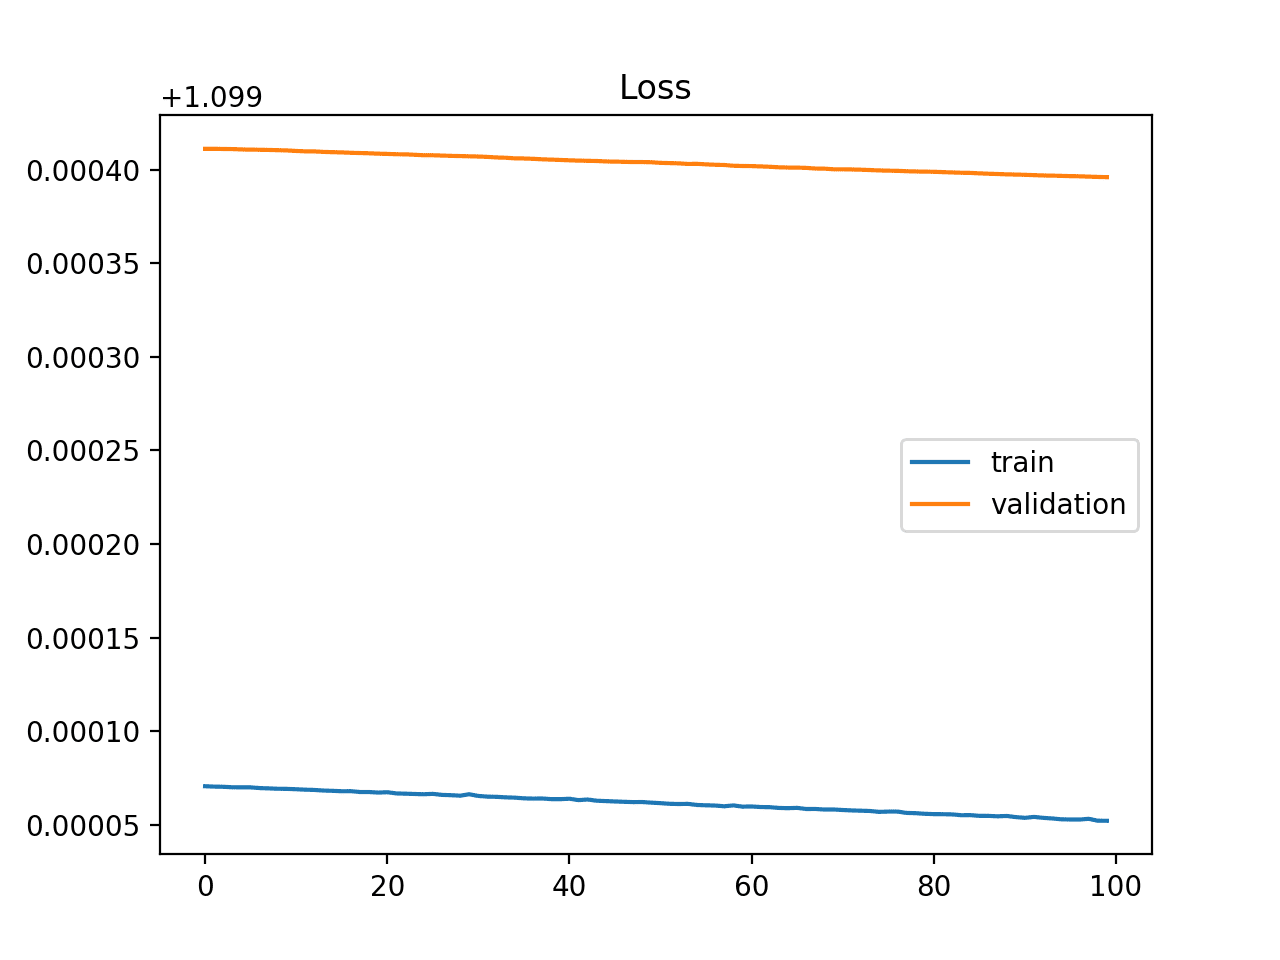

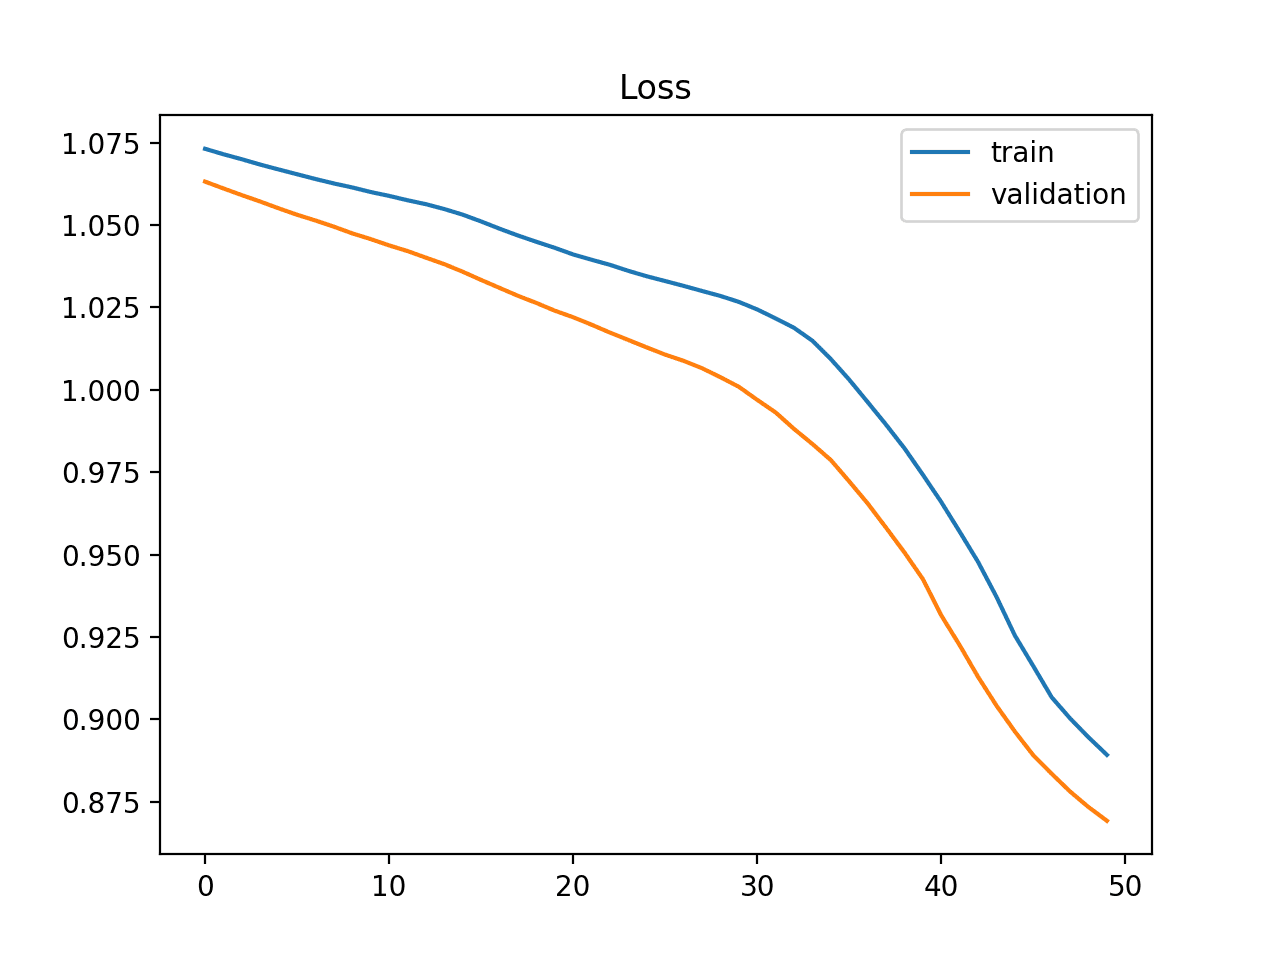

**Good Fit**

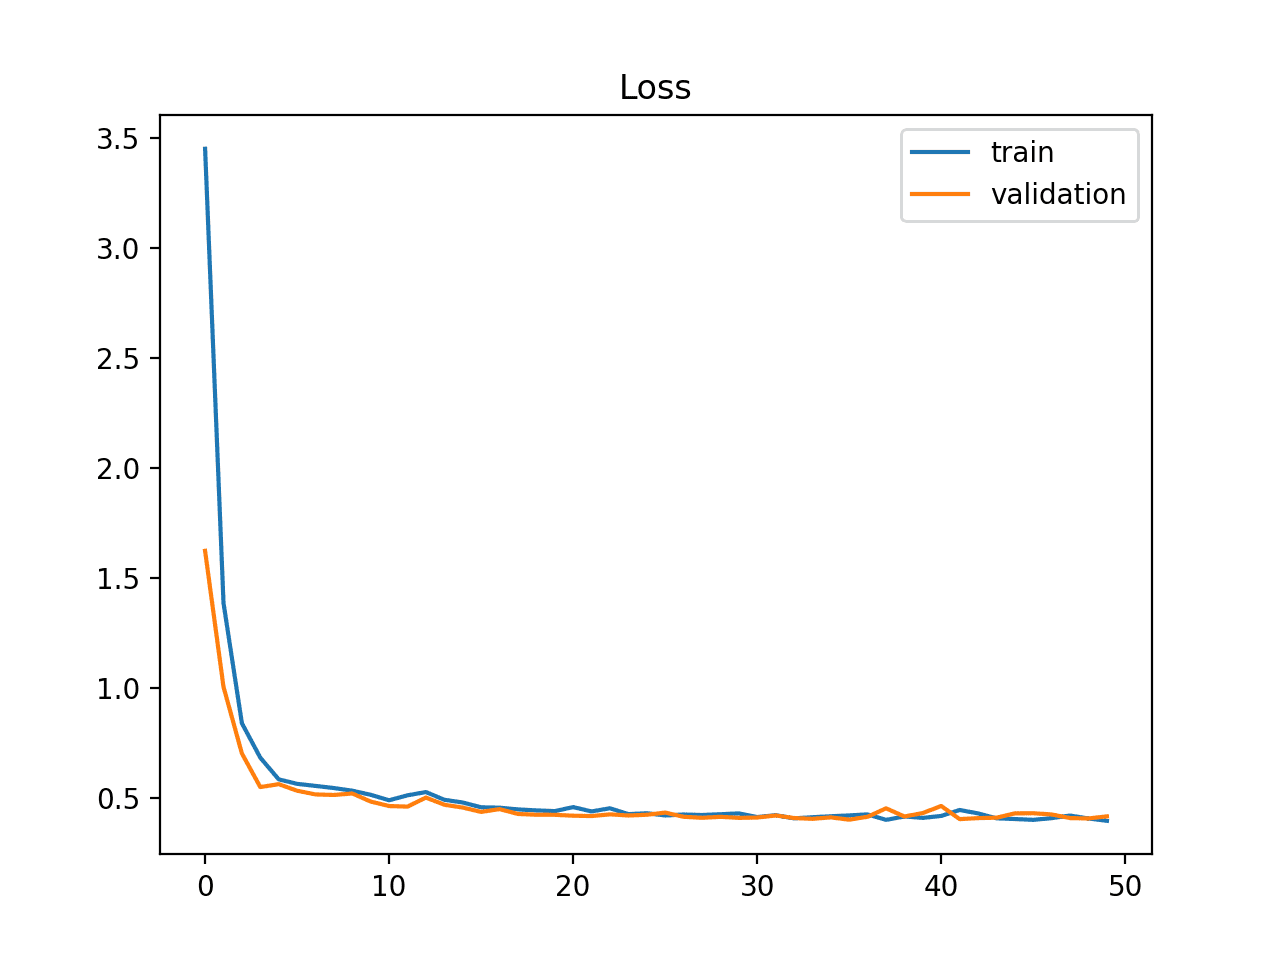

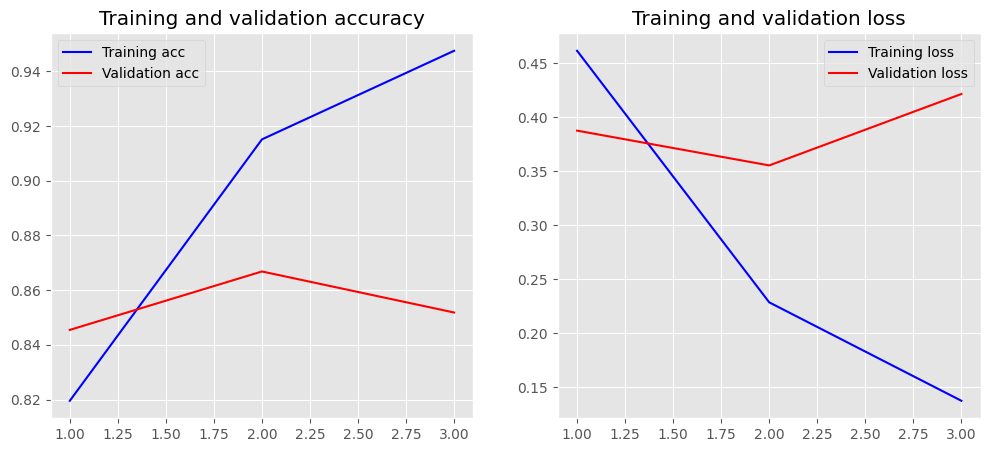

In [29]:
# history.history
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

%matplotlib inline
plot_history(history)

Hasilnya jika kita melihat visualisasinya model yang kita kembangkan tergolong Underfitting. Disinyalir karena:


*   Data training terlalu sedikit
*   Proses training berhenti terlalu cepat. Mungkin saja penerapan EarlyStopping untuk kasus kita tidak terlalu tepat



In [30]:
model.save('model.h5')
print("Model has created!")

Model has created!


c:\Users\Asani\Documents\GitHub\23001042-15-ACIA-project-gold\env\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Predict

In [31]:
import re
from keras.models import load_model

# Rasa syukur, cukup.
input_text = """
Macet begini malah hampir nabrak.
"""

def cleansing(sent):
    # Mengubah kata menjadi huruf kecil semua dengan menggunakan fungsi lower()
    string = sent.lower()
    # Menghapus emoticon dan tanda baca menggunakan "RegEx" dengan script di bawah
    string = re.sub(r'[^a-zA-Z0-9]', ' ', string)
    return string

sentiment = ['negative', 'neutral', 'positive']

text = [cleansing(input_text)]
predicted = tokenizer.texts_to_sequences(text)
guess = pad_sequences(predicted, maxlen=X.shape[1])

model = load_model('model.h5')
prediction = model.predict(guess)
polarity = np.argmax(prediction[0])

print("Text: ",text[0])
print("Sentiment: ",sentiment[polarity])

1/1 [==============================] - 1s 904ms/step
Text:   macet begini malah hampir nabrak  
Sentiment:  negative
